# PtitPrinceによるPythonでのRaincloud plotの描画

Raincloud plotを描画するときにPtitPrinceを使うことがあるのですが、日本語のメモが無かったので書きました。

## Raincloud plotとは
Raincloud plotは簡単に言えば**生データ (strip plot), 箱ひげ図 (box plot), バイオリン図 (violin plot)を見やすく組み合わせた**データの描画手法である。Micah Allen氏の[Introducing Raincloud Plots!](https://micahallen.org/2018/03/15/introducing-raincloud-plots/)というブログで初めに提案され、その後論文にもなっている (Allen et al., Wellcome Open Res. 2019)。

> Allen M, Poggiali D, Whitaker K, Marshall TR, Kievit RA. Raincloud plots: a multi-platform tool for robust data visualization. Wellcome Open Res. 2019 Apr 1;4:63. doi: 10.12688/wellcomeopenres.15191.1. PMID: 31069261; PMCID: PMC6480976.

この論文に付属して、R, PythonおよびMatlabでRaincloud plotを描画するためのtutorialが以下のリポジトリである。

> <https://github.com/RainCloudPlots/RainCloudPlots>

このリポジトリを参考にしてRaincloud plotとseabornのviolin plotなどと同様に描画できるようなライブラリにしたのが**PtitPrince**である。
> <https://github.com/pog87/PtitPrince>


## Setup
### PtitPrinceのinstall
pipでinstallする場合は`pip install ptitprince`を実行する。

In [ ]:
# !pip install ptitprince

In [1]:
import ptitprince as pt

### ライブラリとサンプルデータセットのload
`ptitprince`の他に`pandas`, `seaborn`, `matplotlib`を用いる。

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")
print(tips.shape)

(244, 7)


描画例のために`seaborn`のtips データセットを用いる。初めの5列を見てみよう。

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## `pt.RainCloud`関数

### 引数の概要

以下は`help(pt.RainCloud)`で表示できる内容の一部を適宜訳したもの。

```python
RainCloud(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient='v', width_viol=0.7, width_box=0.15, palette='Set2', bw=0.2, linewidth=1, cut=0.0, scale='area', jitter=1, move=0.0, offset=None, point_size=3, ax=None, pointplot=False, alpha=None, dodge=False, linecolor='red', **kwargs)
```

異なるカテゴリ`x`の尺度`y`のRaincloud plotを描画する。ただし、`x`と`y`はpandas dataframe の`data`の異なる列である。

主な入力：
- `x` : categorical data. Iterable, np.array, or dataframe column name if `data` is specified
- `y` : measure data. Iterable, np.array, or dataframe column name if `data` is specified
- `hue` : a second categorical data. Use it to obtain different clouds and rainpoints
- `data` : input pandas dataframe
- `order` : list, order of the categorical data
- `hue_order` : list, order of the hue
- `orient` : string, vertical if `"v"` (default), horizontal if `"h"`
- `width_viol` : float, width of the cloud
- `width_box` : float, width of the boxplot
- `move` : float, adjusts rain position to the x-axis (default value 0.)
- `offset` : float, adjusts cloud position to the x-axis

kwargs can be passed to the [cloud (default), boxplot, rain/stripplot, pointplot] by preponing `[cloud_, box_, rain_ point_]` to the argument name.


### 描画例とRaincloud plotについて
`pt.RainCloud`関数を使ってRainCloud plotを描画してみよう。

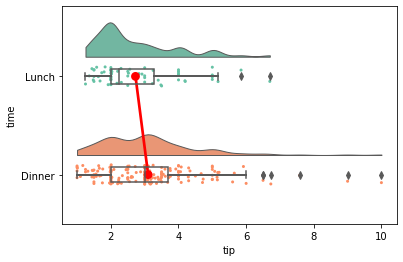

In [4]:
pt.RainCloud(x="time", y="tip", data=tips, orient="h", pointplot=True)

ただし、"RainCloud"「雨雲」と呼ばれる理由が分かりやすいように描画方向を水平向きにした。RainCloud plotは以下の4つの構成要素から成る。

1. 「雲」("Cloud")：カーネル密度推定 (あるいはhalf violinplot)
2. 「雨」("Rain")：雲の下の stripplot
3. 「傘」("Umberella")：箱ひげ図 (boxplot)
4. 「雷」("Thunder")：異なる群の平均値を結ぶ pointplot (`pointplot=True`の場合)

しかし、わざわざRainCloud plotを導入しなくても生データ(strip plot), 箱ひげ図(box plot), バイオリン図(violin plot)の組み合わせであれば`sns.violinplot`と`sns.stripplot`でも実現可能である。比較のために描画してみよう。

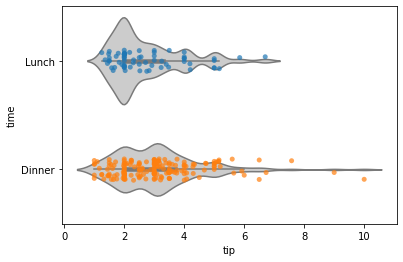

In [5]:
sns.violinplot(y="time", x="tip", data=tips, orient="h", color=".8", bw=0.2)
sns.stripplot(y="time", x="tip", data=tips,  orient="h", alpha=.7)

箱ひげ図とstrip plotが被り見にくいことが分かる。violin plotは左右対称だがこれは冗長な表現とも言えるので、半分に切り、箱ひげ図を横にずらして見やすくしたのがRainCloud plotである。

### plotの向きを変える

`orient="v"`とすれば垂直に、`orient="h"`とすれば水平に描画される。デフォルトは`"v"`である。

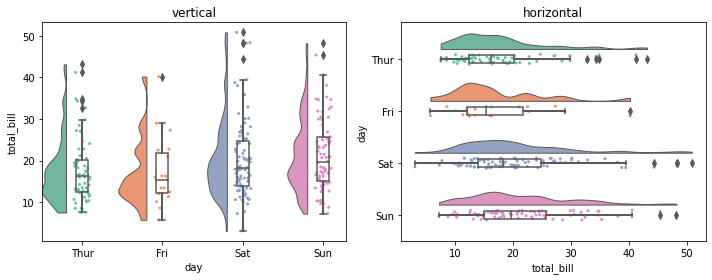

In [6]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1); plt.title("vertical")
pt.RainCloud(x="day", y="total_bill", data=tips, orient="v")
plt.subplot(1,2,2); plt.title("horizontal")
pt.RainCloud(x="day", y="total_bill", data=tips, orient="h")
plt.tight_layout()

### 平均値の変化を描画する

`pointplot=True`とすれば平均値の変化が描画される。defaultの色は赤だが,`linecolor`の引数を指定することで色を変更できる。

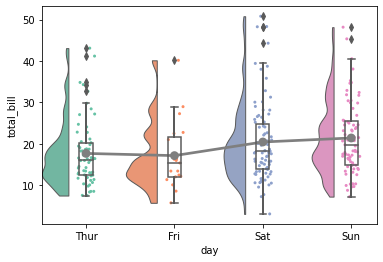

In [7]:
pt.RainCloud(x="day", y="total_bill", data=tips, pointplot=True, linecolor='tab:gray')

### 各グループでの比較
`hue`を指定することで2つ目のカテゴリについての比較もできる。ここでは同様のことが可能なviolin plotの場合との比較をしている。なお、`alpha`に[0, 1]の数字を与えることで透過度を変更できる。

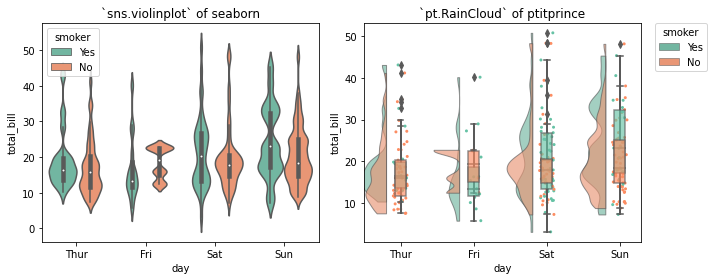

In [8]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1); plt.title("`sns.violinplot` of seaborn")
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette='Set2', bw=.2)
plt.subplot(1,2,2); plt.title("`pt.RainCloud` of ptitprince")
pt.RainCloud(x="day", y="total_bill", hue="smoker", data=tips, alpha=.65)
plt.tight_layout()

### 箱ひげ図の位置をずらす
前節の描画では箱ひげ図の位置が被っており見にくかった。このような場合は`dodge = True` とすれば箱ひげ図の位置をずらすことができる。さらに`pointplot=True`としたのが以下である。

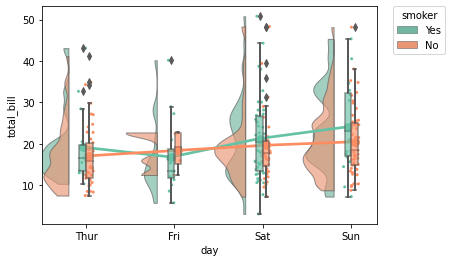

In [9]:
pt.RainCloud(x="day", y="total_bill", hue="smoker", data=tips, alpha=.65, dodge=True, pointplot=True)

## `pt.half_violinplot`関数

恐らく使う機会はあまりないだろうが、`pt.half_violinplot`というviolin plotの片側のみを描画する関数も用意されている。

```python
half_violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, offset=0.15, **kwargs)
```

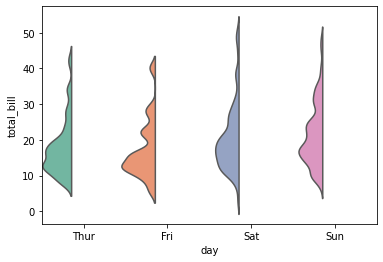

In [10]:
pt.half_violinplot(x="day", y="total_bill", data=tips, palette="Set2", bw=0.2, inner=None)

## まとめ
- Raincloud plotは生データとその分布を描画するのに優れた手法である。
- PtitPrinceというライブラリを用いればPythonでRaincloud plotを簡単に描画できる。